In [1]:
import os
WORKING_DIRECTORY = os.getcwd()
print("Current working directory: {}".format(WORKING_DIRECTORY))

Current working directory: /home/gabriel/Personal/jupyter/kaggle/dogsandcats/notebooks


In [3]:
ORIGINAL_TRAIN_DIRECTORY = "../data/original_train/"
TRAIN_DIRECTORY = "../data/train/"
VALID_DIRECTORY = "../data/valid/"
TEST_DIRECTORY = "../data/test/"

IMAGE_SIZE = (360,404)
CLASSES = ['cat', 'dog']

VALIDATION_SIZE = 0.2 # size of the validation we want to use
TEST_SIZE = 0.1

## Samples

In [4]:
plot_grid(imgs, titles=labels)

NameError: name 'plot_grid' is not defined

In [2]:
%autosave 0

Autosave disabled


## Data size

In [6]:
import pandas as pd
import glob
from PIL import Image

files = glob.glob(ORIGINAL_TRAIN_DIRECTORY + '*')
df = pd.DataFrame({'fpath':files,'width':0,'height':0})
df['category'] = df.fpath.str.extract('../data/original_train/([a-zA-Z]*).', expand=False) # extract class
for idx in df.index:
    im = Image.open(df.ix[idx].fpath)
    df.ix[idx,['width','height']] = im.size

In [38]:
df.head()

,fpath,height,width,category
0,../data/original_train/dog.798.jpg,293,249,dog
1,../data/original_train/dog.10748.jpg,301,349,dog
2,../data/original_train/dog.8365.jpg,375,499,dog
3,../data/original_train/cat.3227.jpg,443,291,cat
4,../data/original_train/dog.9597.jpg,221,294,dog


In [39]:
df.describe()

,height,width
count,25000.000000,25000.00000
mean,360.478080,404.09904
std,97.019959,109.03793
min,32.000000,42.00000
25%,301.000000,323.00000
50%,374.000000,447.00000
75%,421.000000,499.00000
max,768.000000,1050.00000


There are 25000 images in the dataset. We can see that the mean size of the images is (360.478080,404.09904). 

In [40]:
df['category'].value_counts()

cat    12500
dog    12500
Name: category, dtype: int64

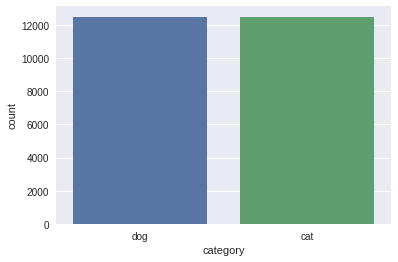

In [7]:
%matplotlib inline
import seaborn as sns

ax = sns.countplot("category", data=df)

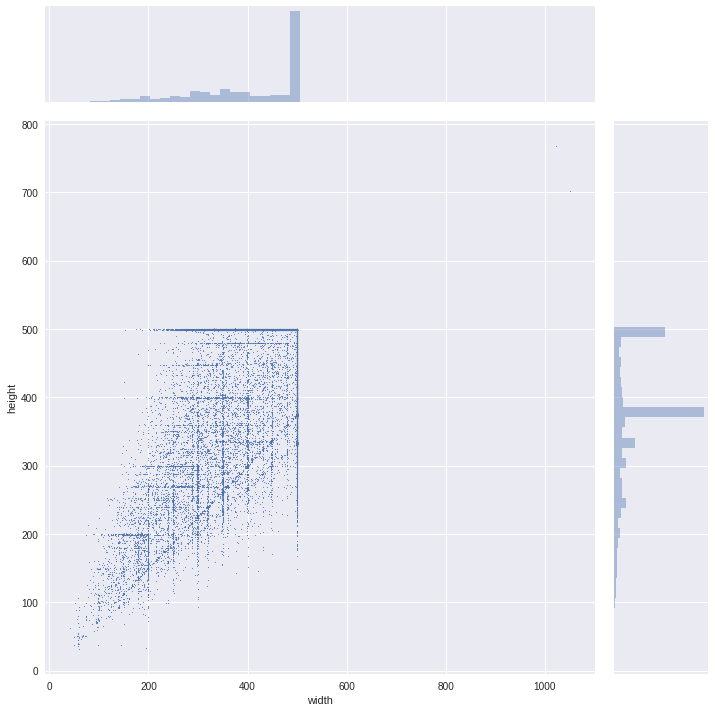

In [43]:
sns.jointplot(x='width', 
              y='height', 
              data=df,
              joint_kws={'s': 0.5}, 
              marginal_kws=dict(bins=50), 
              size=10,
              stat_func=None);

## Data preparation

The dataset can be downloaded from https://www.kaggle.com/c/the-nature-conservancy-fisheries-monitoring/data.

Number of training examples:

In [9]:
import os
TOTAL_NUMBER_FILES = sum([len(files) for r, d, files in os.walk(ORIGINAL_TRAIN_DIRECTORY)])
print("Total number of files in train folder:", TOTAL_NUMBER_FILES)

Total number of files in train folder: 25000


### Folder structure

The train directory consist of labelled data with the following convention for each image: 

data/train/CLASS.id.jpg

We are going to use keras.preprocessing.image so we want the folder structure to be:

data/train/CLASS/image-name.jpg

In [11]:
import glob
import os
import shutil
import numpy as np

shutil.rmtree(os.path.join(TEST_DIRECTORY, "dog"), ignore_errors=True)
shutil.rmtree(os.path.join(TEST_DIRECTORY, "cat"), ignore_errors=True)

shutil.rmtree(os.path.join(VALID_DIRECTORY, "dog"), ignore_errors=True)
shutil.rmtree(os.path.join(VALID_DIRECTORY, "cat"), ignore_errors=True)

shutil.rmtree(os.path.join(TRAIN_DIRECTORY, "dog"), ignore_errors=True)
shutil.rmtree(os.path.join(TRAIN_DIRECTORY, "cat"), ignore_errors=True)

os.mkdir(os.path.join(TEST_DIRECTORY, "dog"))
os.mkdir(os.path.join(TEST_DIRECTORY, "cat"))

os.mkdir(os.path.join(VALID_DIRECTORY, "dog"))
os.mkdir(os.path.join(VALID_DIRECTORY, "cat"))

os.mkdir(os.path.join(TRAIN_DIRECTORY, "dog"))
os.mkdir(os.path.join(TRAIN_DIRECTORY, "cat"))



In [12]:
#########################
# DOGS
##########
#random list of dog files
dog_pattern = ORIGINAL_TRAIN_DIRECTORY + "dog.*"
dog_files = np.random.permutation(glob.glob(dog_pattern))

# randomly split the files in train folder and move them to validation
number_validation_dog_files = int(len(dog_files) * VALIDATION_SIZE)
number_test_dog_files = int(len(dog_files) * TEST_SIZE)

for index, dog_file in enumerate(dog_files):
    file_name = os.path.split(dog_file)[1]
    if index < number_validation_dog_files:#validation files
        new_path = os.path.join(VALID_DIRECTORY, "dog",  file_name)
    elif index >= number_validation_dog_files and index < (number_validation_dog_files + number_test_dog_files):
        new_path = os.path.join(TEST_DIRECTORY, "dog",  file_name)
    else:
        new_path = os.path.join(TRAIN_DIRECTORY, "dog",  file_name)
    shutil.copy(dog_file, new_path)

#########################
# CATS
##########
#random list of dog files
cat_pattern = ORIGINAL_TRAIN_DIRECTORY + "cat.*"
cat_files = np.random.permutation(glob.glob(cat_pattern))

# randomly split the files in train folder and move them to validation
number_validation_cat_files = int(len(cat_files) * VALIDATION_SIZE)
number_test_cat_files = int(len(cat_files) * TEST_SIZE)

for index, cat_file in enumerate(cat_files):
    file_name = os.path.split(cat_file)[1]
    if index < number_validation_cat_files:
        new_path = os.path.join(VALID_DIRECTORY, "cat",  file_name)
    elif index >= number_validation_cat_files and index < (number_validation_cat_files+number_test_cat_files):
        new_path = os.path.join(TEST_DIRECTORY, "cat",  file_name)
    else:
        new_path = os.path.join(TRAIN_DIRECTORY, "cat",  file_name)
    shutil.copy(cat_file, new_path)    

In [ ]:
## Samples

In [21]:
import utils;
from utils import *

batch_generator = get_keras_batch_generator(VALID_DIRECTORY, batch_size=2, target_size=(IMAGE_SIZE[0], IMAGE_SIZE[1]))

imgs,labels = next(batch_generator)

Found 5000 images belonging to 2 classes.


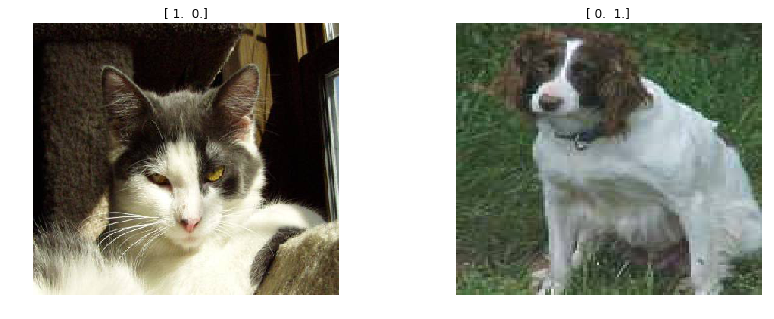

In [22]:
%matplotlib inline
plot_grid(imgs, titles=labels)

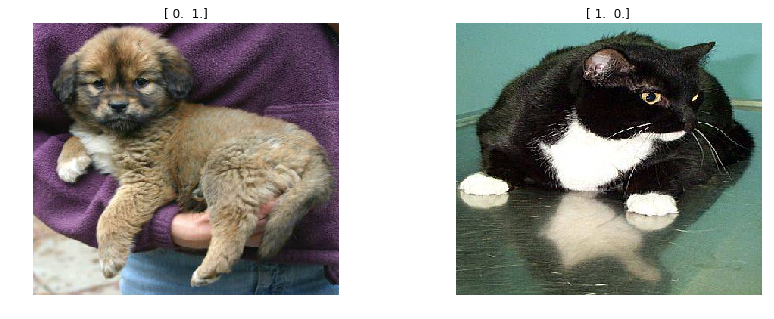

In [23]:
imgs,labels = next(batch_generator)
%matplotlib inline
plot_grid(imgs, titles=labels)